In [23]:
import numpy as np

In [24]:
import pandas as pd

In [25]:
from glob import glob

In [26]:
import os

In [27]:
FIG = "FIG"
OUT = "OUTPUTS"
RESULTS = "RESULTS"
import xarray as xr

In [28]:
all_network_designs = glob('RESULTS/NetworkDesign-*.csv')
len(all_network_designs)

123

In [29]:
path = all_network_designs[0]
[network_goal, network_type, province, is_seasonal, is_variable] = os.path.basename(path).split('.')[0].split('-')
network_goal, network_type, province, is_seasonal, is_variable

('NetworkDesign', 'SCDNA', 'Alberta', 'noseason', 'uniform')

In [30]:
def extract_info(path):
    network_design_name = os.path.basename(path).split('.')[0]
    try:
        [network_goal, network_type, province, is_seasonal, is_variable] = network_design_name.split('-')
    except ValueError:
        [network_goal, network_type, province] = network_design_name.split('-')
        is_seasonal = 'season'
        is_variable = 'variable'
    return network_type, province, is_seasonal, is_variable

In [31]:
unc_dict = {'SCDNA': {}, 'scratch': {}}
provinces = []
for path in all_network_designs:
    network_type, province, is_seasonal, is_variable = extract_info(path)
    print(network_type, province, is_seasonal, is_variable)
    provinces.append(province)
    if is_seasonal == 'season':
        OND_table = pd.read_csv(path, index_col=0)
        unc_curr = OND_table['Uncertainty'].values
        unc_dict[network_type][province] = unc_curr

SCDNA Alberta noseason uniform
SCDNA Alberta noseason uniform2
SCDNA Alberta noseason variable
SCDNA Alberta noseason variable2
SCDNA Alberta season variable
SCDNA Alberta2 season variable
SCDNA British_Columbia noseason uniform
SCDNA British_Columbia noseason uniform2
SCDNA British_Columbia noseason variable
SCDNA British_Columbia noseason variable2
SCDNA British_Columbia season variable
SCDNA British_Columbia2 season variable
SCDNA Manitoba noseason uniform
SCDNA Manitoba noseason uniform2
SCDNA Manitoba noseason variable
SCDNA Manitoba noseason variable2
SCDNA Manitoba season variable
SCDNA Manitoba2 season variable
SCDNA Newfoundland_and_Labrador noseason uniform
SCDNA Newfoundland_and_Labrador noseason uniform2
SCDNA Newfoundland_and_Labrador noseason variable
SCDNA Newfoundland_and_Labrador noseason variable2
SCDNA Newfoundland_and_Labrador season variable
SCDNA Newfoundland_and_Labrador2 season variable
SCDNA New_Brunswick noseason uniform
SCDNA New_Brunswick noseason uniform2
S

In [32]:
provinces = np.unique(np.array(provinces))

In [33]:
OND_table = pd.read_csv(path, index_col=0)
OND_table

Index  Uncertainty
1    298147     9.250113
2    296944     7.953622
3    300560     7.168994
4    296939     6.934552
5    296948     6.274318
..      ...          ...
196  291095     2.275724
197  296944     2.274084
198  293361     2.265319
199  289752     2.264398
200  289736     2.263215

[200 rows x 2 columns]

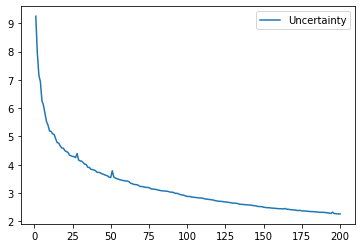

In [34]:
OND_table.plot(y='Uncertainty')

In [35]:
unc = OND_table['Uncertainty'].values

In [36]:
from matplotlib import pyplot as plt

In [37]:
plt.plot(unc)

In [38]:
unc_data = unc_dict['SCDNA'][province]
unc_data[~np.isnan(unc_data)]

array([11.76583429,  9.0458663 ,  7.73017949,  7.40853063,  6.66106301,
        6.36240021,  5.82391448,  5.77342639,  5.64332589,  5.45815913,
        5.2714647 ,  5.08828061,  5.02533704,  4.96753079,  4.78447424,
        4.75503832,  4.75335346,  4.59971572,  4.57342602,  4.51363858,
        4.47113476,  4.42726277,  4.35615507,  4.33776998,  4.319899  ,
        4.1989766 ,  4.19134406,  4.19044822,  4.17366639,  4.16637493,
        4.09587029,  4.05178277,  3.9878    ,  3.98439176,  3.93541746,
        3.89288676,  3.88823083,  3.86334703,  3.83375856,  3.81033072,
        3.79751797,  3.78058636,  3.72948183,  3.71576822,  3.64187749,
        3.62892512,  3.6223439 ,  3.61201271,  3.60141891,  3.59392778,
        3.56117945,  3.53092646,  3.51623606,  3.50932973,  3.46262415,
        3.43577668,  3.43404244,  3.41047907,  3.38443844,  3.38124743,
        3.37334682,  3.35307948,  3.33428015,  3.31203052,  3.28874435,
        3.26197253,  3.23936298,  3.23087394,  3.22195605,  3.21

Note that unc. data is missing for empty (scratch) and current (SCDNA) network before adding any station

In [39]:
path

'RESULTS\\NetworkDesign-scratch-Yukon.csv'

In [40]:
prov_size = {'New Brunswick':73000, 'Prince Edward Island':6000, 'Nova Scotia':55000, 
                 'Newfoundland and Labrador':405000,
            'Alberta':662000, 'British Columbia':945000, 'Manitoba':648000, 
            'Saskatchewan':651000, 'Ontario':1076000, 'Quebec':1542000,
            'Yukon':482000, 'Northwest Territories':1346000, 'Nunavut':2093000}
dict_size = {'New Brunswick':4000, 'Prince Edward Island':4000, 'Nova Scotia':4000, 'Newfoundland and Labrador':1000,
        'Alberta':1000, 'British Columbia':1000, 'Manitoba':500, 'Saskatchewan':500, 'Ontario':500, "Québec":500,
        'Yukon':100, 'Northwest Territories':100, 'Nunavut':100}
vmax_dict = {100:20, 1000:20}

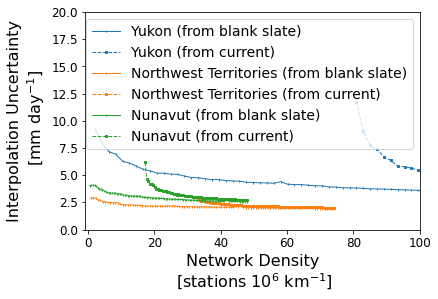

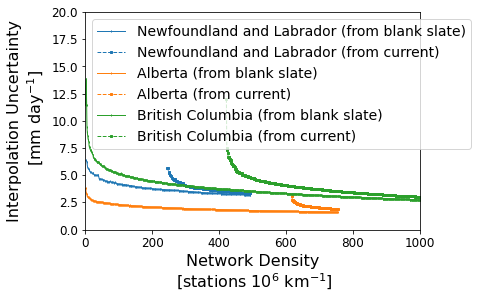

In [41]:
for group, vmax in vmax_dict.items():
    plt.figure()
    ax = plt.gca()
    provinces_select = [province for (province, size) in dict_size.items() if size==group]
    for province in provinces_select:
        province_ = province.replace(' ','_')
        path_scratch = f"RESULTS\\NetworkDesign-scratch-{province_}.csv"
        OND_table_scratch = pd.read_csv(path_scratch, index_col=0)
        h = ax.plot(1000000*OND_table_scratch.index/prov_size[province], OND_table_scratch.Uncertainty, 
                    markersize=2, linewidth=1, marker='|', linestyle='-', label=f"{province} (from blank slate)")
        color = h[0].get_color()

        path_SCDNA = f"RESULTS\\NetworkDesign-SCDNA-{province_}.csv"
        OND_table_SCDNA = pd.read_csv(path_SCDNA, index_col=0)
        ax.plot(1000000*OND_table_SCDNA.index/prov_size[province], OND_table_SCDNA.Uncertainty, 
                markersize=2, color=color, linewidth=1, linestyle='--', marker='s', label=f"{province} (from current)")
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=14)
    plt.xlabel('Network Density\n [stations $10^6$ km$^{-1}$]', fontsize=16)
    plt.ylabel('Interpolation Uncertainty\n [mm day$^{-1}$]', fontsize=16)
    plt.axis([-1,dict_size[province],0,vmax])

In [42]:
dict_size = {'New Brunswick':150, 'Prince Edward Island':70, 'Nova Scotia':200, 'Newfoundland and Labrador':200,
        'Alberta':500, 'British Columbia':1000, 'Manitoba':400, 'Saskatchewan':400, 'Ontario':500, "Quebec":500,
        'Yukon':200, 'Northwest Territories':100, 'Nunavut':100}

New Brunswick
Prince Edward Island
Nova Scotia
Newfoundland and Labrador
Alberta
British Columbia
Manitoba
Saskatchewan
Ontario
Quebec
Yukon
Northwest Territories
Nunavut


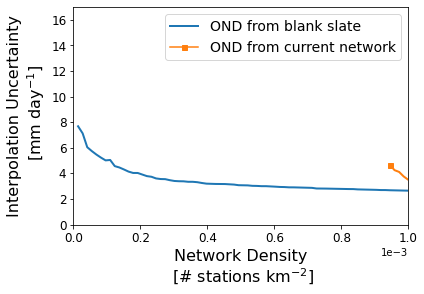

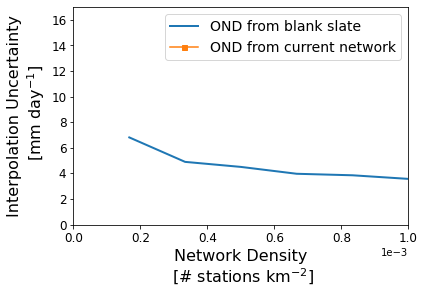

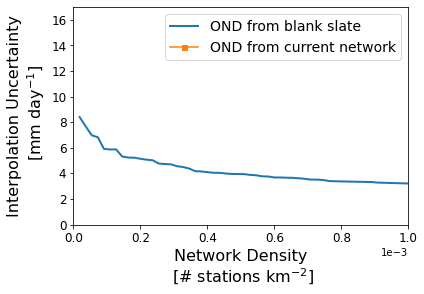

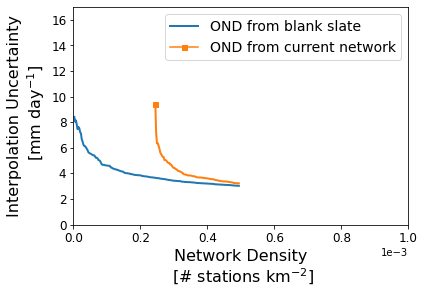

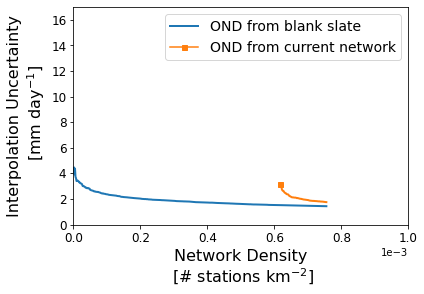

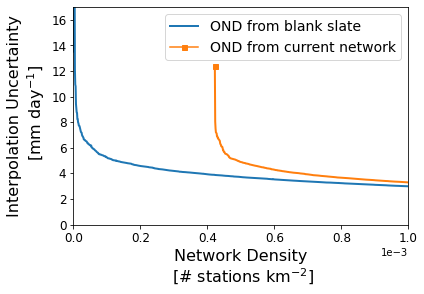

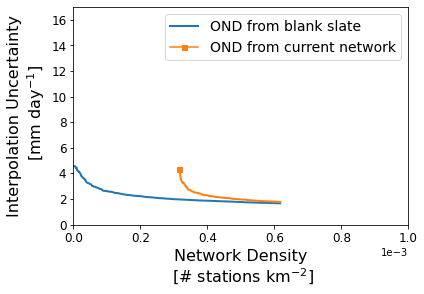

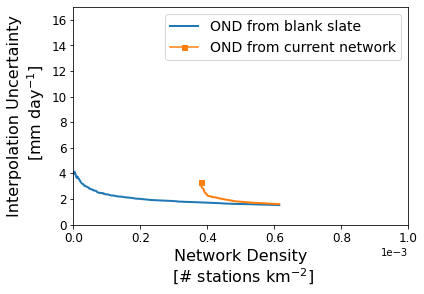

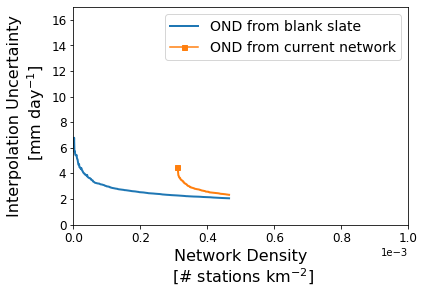

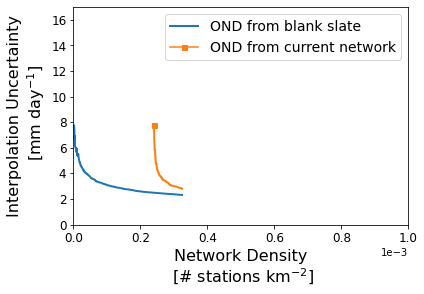

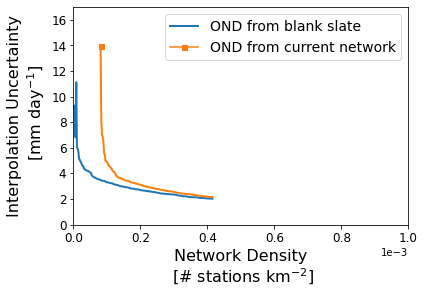

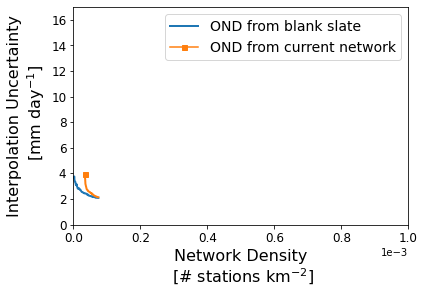

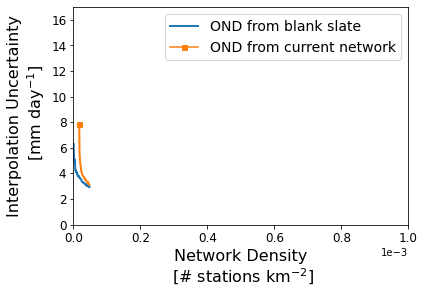

In [54]:
for province, size in dict_size.items():
    print(province)
    fig = plt.figure()
    ax = plt.gca()
    province_ = province.replace(' ','_')
    path_scratch = f"RESULTS\\NetworkDesign-scratch-{province_}-noseason-uniform.csv"
    OND_table_scratch = pd.read_csv(path_scratch, index_col=0)
    h = ax.plot(OND_table_scratch.index/prov_size[province], OND_table_scratch.Uncertainty, 
                markersize=5, linewidth=2,  linestyle='-', label=f"OND from blank slate")

    path_SCDNA = f"RESULTS\\NetworkDesign-SCDNA-{province_}-noseason-uniform.csv"
    OND_table_SCDNA = pd.read_csv(path_SCDNA, index_col=0)
    index0 = OND_table_SCDNA.dropna().index[0]
    #OND_table_SCDNA.iat[OND_table_SCDNA.dropna().index[0]-2,1] = unc0
    h = ax.plot(index0/prov_size[province], OND_table_SCDNA.iloc[index0-1].Uncertainty, 
            markersize=5, marker='s', label=f"OND from current network")
    color = h[0].get_color()
    ax.plot(OND_table_SCDNA.index/prov_size[province], OND_table_SCDNA.Uncertainty, 
            markersize=5, linewidth=2, linestyle='-', color=color)
    plt.xticks(fontsize=12)
    plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x')
    plt.yticks(fontsize=12)
    plt.legend(fontsize=14)
    plt.xlabel('Network Density\n [# stations km$^{-2}$]', fontsize=16)
    plt.ylabel('Interpolation Uncertainty\n [mm day$^{-1}$]', fontsize=16)
    vmax = 17#OND_table_SCDNA.Uncertainty.max() + 5
    plt.axis([0,0.001,0,vmax])
    fig.savefig(os.path.join(FIG,f"NetworkDesign_{province.replace(' ','_')}_uniform.png"), bbox_inches='tight')

New Brunswick
Prince Edward Island
Nova Scotia
Newfoundland and Labrador
Alberta
British Columbia
Manitoba
Saskatchewan
Ontario
Quebec


FileNotFoundError: [Errno 2] No such file or directory: 'RESULTS\\NetworkDesign-SCDNA-Quebec-noseason-uniform2.csv'

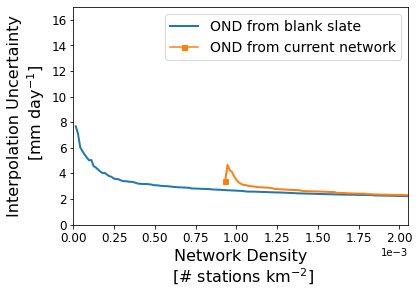

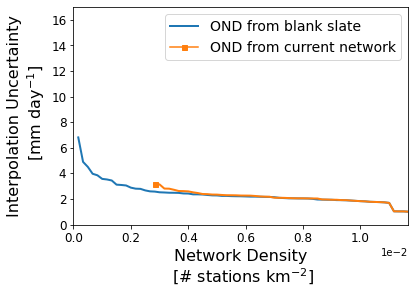

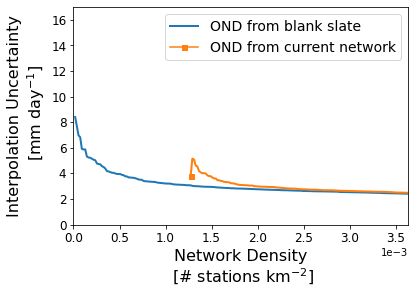

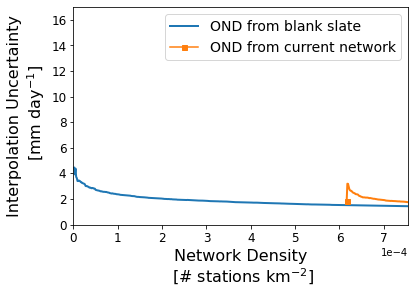

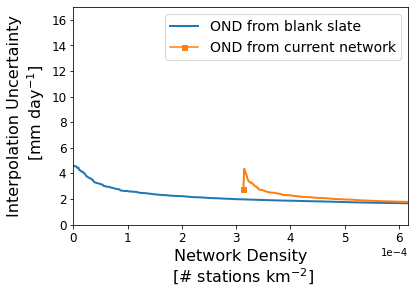

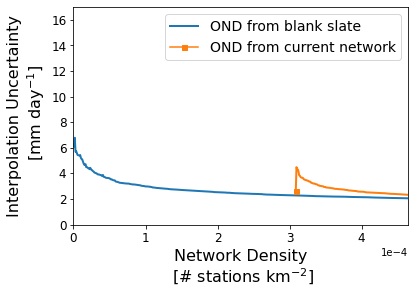

In [51]:
for province, size in dict_size.items():
    print(province)
    fig = plt.figure()
    ax = plt.gca()
    province_ = province.replace(' ','_')
    path_scratch = os.path.join(RESULTS,f"NetworkDesign-scratch-{province_}-noseason-uniform.csv")
    OND_table_scratch = pd.read_csv(path_scratch, index_col=0)
    ax.plot(OND_table_scratch.index/prov_size[province], OND_table_scratch.Uncertainty, 
                markersize=5, linewidth=2,  linestyle='-', label=f"OND from blank slate")
    #path_UNC = f"OUTPUTS\\Unc_map-{province_}-SCDNA_UNI.nc"
    #UNC = xr.open_dataset(path_UNC)
    #unc0 = UNC.uncertainty.max()

    path_SCDNA = os.path.join(RESULTS,f"NetworkDesign-SCDNA-{province_}-noseason-uniform2.csv")
    OND_table_SCDNA = pd.read_csv(path_SCDNA, index_col=0)
    index0 = OND_table_SCDNA.dropna().index[0]
    #OND_table_SCDNA.iat[OND_table_SCDNA.dropna().index[0]-2,1] = unc0
    h = ax.plot(index0/prov_size[province], OND_table_SCDNA.iloc[index0-1].Uncertainty, 
            markersize=5, marker='s', label=f"OND from current network")
    color = h[0].get_color()
    ax.plot(OND_table_SCDNA.index/prov_size[province], OND_table_SCDNA.Uncertainty, 
            markersize=5, linewidth=2, linestyle='-', color=color)
    plt.xticks(fontsize=12)
    plt.ticklabel_format(style='sci', scilimits=(0,0), axis='x')
    plt.yticks(fontsize=12)
    plt.legend(fontsize=14)
    plt.xlabel('Network Density\n [# stations km$^{-2}$]', fontsize=16)
    plt.ylabel('Interpolation Uncertainty\n [mm day$^{-1}$]', fontsize=16)
    vmax = 17#OND_table_SCDNA.Uncertainty.max() + 5
    plt.axis([0,size/prov_size[province],0,vmax])
    fig.savefig(os.path.join(FIG,f"NetworkDesign_{province.replace(' ','_')}_uniform2.png"))

In [47]:
from glob import glob
glob(RESULTS+'\\*New_Brunswick*2.csv')

['RESULTS\\NetworkDesign-SCDNA-New_Brunswick-noseason-uniform2.csv',
 'RESULTS\\NetworkDesign-SCDNA-New_Brunswick-noseason-variable2.csv',
 'RESULTS\\NetworkDesign-SCDNA-New_Brunswick2.csv']